# Test training for cx population

In [1]:
# Import libraries
import nest
import random

import matplotlib.pyplot as plt
import seaborn as sns

from model.network import Network


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Jul 22 2023 00:00:00

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# Set threads
nest.local_num_threads = 2

In [3]:
# Instantiate network
net = Network(n_train_images=9)

In [4]:
nest.GetDefaults('aeif_cond_alpha')

{'a': 4.0,
 'archiver_length': 0,
 'available': (348, 348),
 'b': 0.01,
 'beta_Ca': 0.001,
 'C_m': 281.0,
 'Ca': 0.0,
 'capacity': (800, 800),
 'Delta_T': 2.0,
 'dg_ex': 0.0,
 'dg_in': 0.0,
 'E_L': -70.6,
 'E_ex': 0.0,
 'E_in': -85.0,
 'element_type': 'neuron',
 'elementsize': 752,
 'frozen': False,
 'g_L': 30.0,
 'g_ex': 0.0,
 'g_in': 0.0,
 'global_id': 0,
 'gsl_error_tol': 1e-06,
 'I_e': 0.0,
 'instantiations': (452, 452),
 'local': True,
 'model': 'aeif_cond_alpha',
 'model_id': 80,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('g_ex', 'g_in', 'V_m', 'w'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 0.2,
 'tau_syn_in': 2.0,
 'tau_w': 144.0,
 'thread': 0,
 'thread_local_id': -1,
 'type_id': 'aeif_cond_alpha',
 'V_m': -70.6,
 'V_peak': -40.4,
 'V_reset': -60.0,
 'V_th': -50.4,
 'vp': -1,
 'w': 0.0}

In [5]:
# Connect to multimeters and spike records
net.connect_all_devices()

In [6]:
# Generate random feature vectors
vector_length = 324
non_zero_elements = 81
binary_vectors = [0] * (net.cx_n//net.SET_CX_NEURON)

for i in range(net.cx_n//net.SET_CX_NEURON):
    binary_vectors[i] = [0] * vector_length
    positions_to_set = random.sample(range(vector_length), non_zero_elements)
    for position in positions_to_set:
        binary_vectors[i][position] = 1   

print("Binary Vector:", binary_vectors)

Binary Vector: [[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 

In [7]:
# Simulate for all populations

for i in range(0, net.n_train_images):
    if i == 0:
        net.input_train_signal(time_id=i, feature_vector=binary_vectors[i])
        net.input_context_signal(neuron_group=i)
        print(f"Run {i}.")
        nest.Simulate(900.0)
    else:
        net.input_train_signal(time_id=i, feature_vector=binary_vectors[i])
        net.input_context_signal(neuron_group=i)
        #net.input_inhib_signal(time_id=i)
        print(f"Run {i}.")
        nest.Simulate(900.0)

Training signal successfully created.
Connecting input to the tc population...
... training signal successfully connected to the tc population.
Contextual signal successfully created.
Connecting input to the cx population...
... contextual signal successfully connected to the cx population.
Run 0.

Jan 30 13:39:14 NodeManager::prepare_nodes [Info]: 
    Preparing 924 nodes for simulation.

Jan 30 13:39:14 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 924
    Simulation time (ms): 900
    Number of OpenMP threads: 2
    Not using MPI

Jan 30 13:39:18 SimulationManager::run [Info]: 
    Simulation finished.
Training signal successfully created.
Connecting input to the tc population...
... training signal successfully connected to the tc population.
Contextual signal successfully created.
Connecting input to the cx population...
... contextual signal successfully connected to the cx population.
Run 1.

Jan 30 13:39:18 NodeManager::prepare_nodes [Info]: 
    Prepar

In [10]:
# Get events from multimeter
cx_vm = net.mult_cx.get()
vm_cx = cx_vm["events"]["V_m"]
ts_vm_cx = cx_vm["events"]["times"]

# Get events from spike recorder
cx_spike = net.spikes_cx.get("events")
send_cx = cx_spike["senders"]
ts_spike_cx = cx_spike["times"]

# Get events from multimeter
in_vm = net.mult_in.get()
vm_in = in_vm["events"]["V_m"]
ts_vm_in = in_vm["events"]["times"]

# Get events from spike recorder
in_spike = net.spikes_in.get("events")
send_in = in_spike["senders"]
ts_spike_in = in_spike["times"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


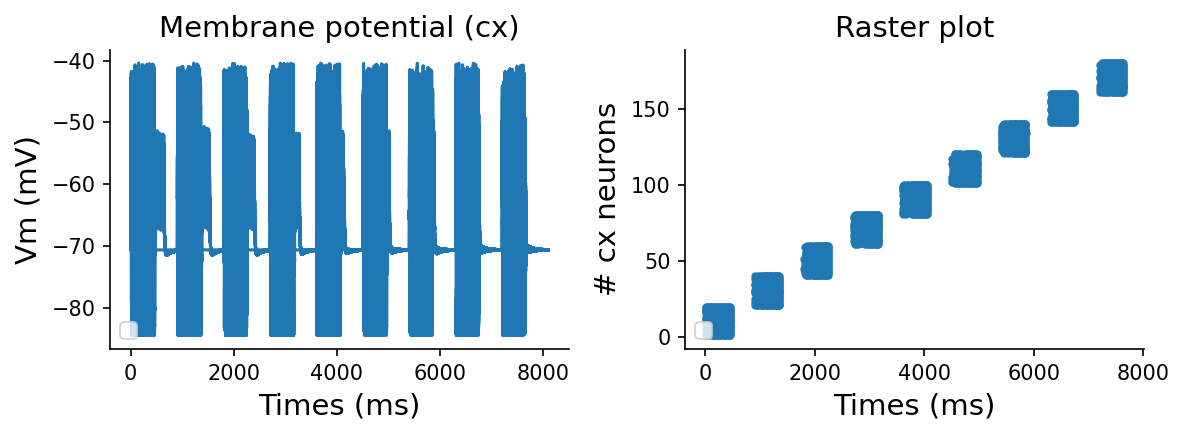

In [11]:
# Plot results

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3), sharey=False)

axs[0].plot(ts_vm_cx, vm_cx)
axs[0].set_title('Membrane potential (cx)', size=14)
axs[0].legend(loc=3)
axs[0].set_xlabel("Times (ms)", size=14)
axs[0].set_ylabel("Vm (mV)", size=14)  # Fixed the ylabel, and "mV" is commonly used for millivolts

axs[1].plot(ts_spike_cx, send_cx, '.')
axs[1].set_title('Raster plot', size=14)
axs[1].legend(loc=3)
axs[1].set_xlabel("Times (ms)", size=14)
axs[1].set_ylabel("# cx neurons", size=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplot
sns.despine()
plt.show()

[[<matplotlib.lines.Line2D at 0x7f1278d671d0>],

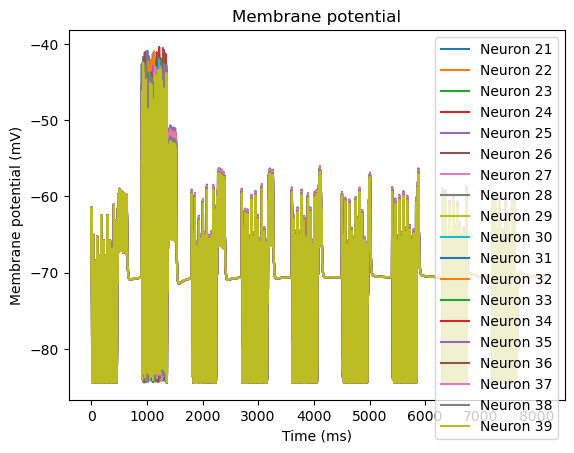

In [20]:
nest.voltage_trace.from_device(net.mult_cx, list(range(21,40)))

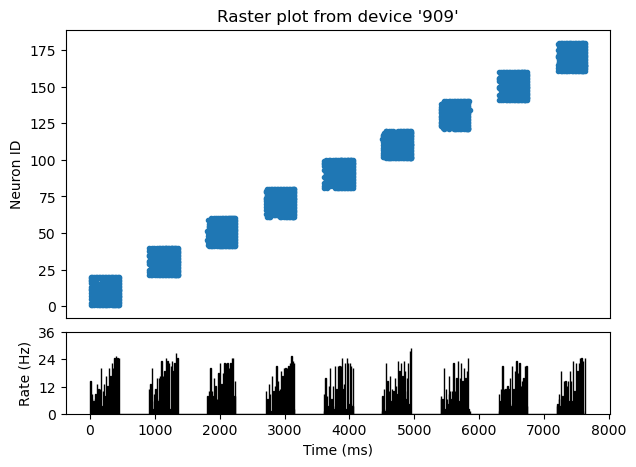

In [12]:
nest.raster_plot.from_device(net.spikes_cx, hist=True)

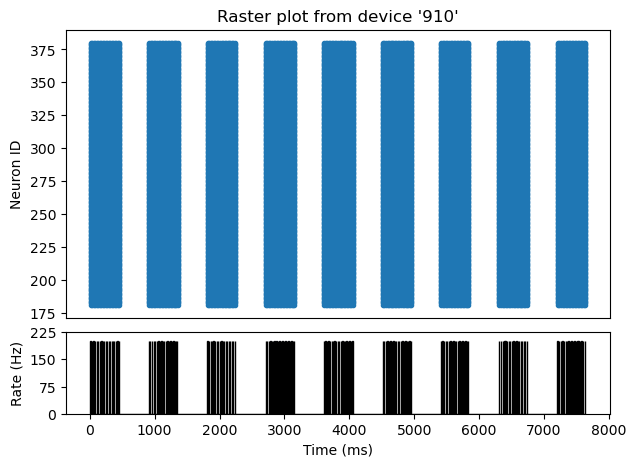

In [13]:
nest.raster_plot.from_device(net.spikes_in, hist=True)

[[<matplotlib.lines.Line2D at 0x7f1286d254c0>],

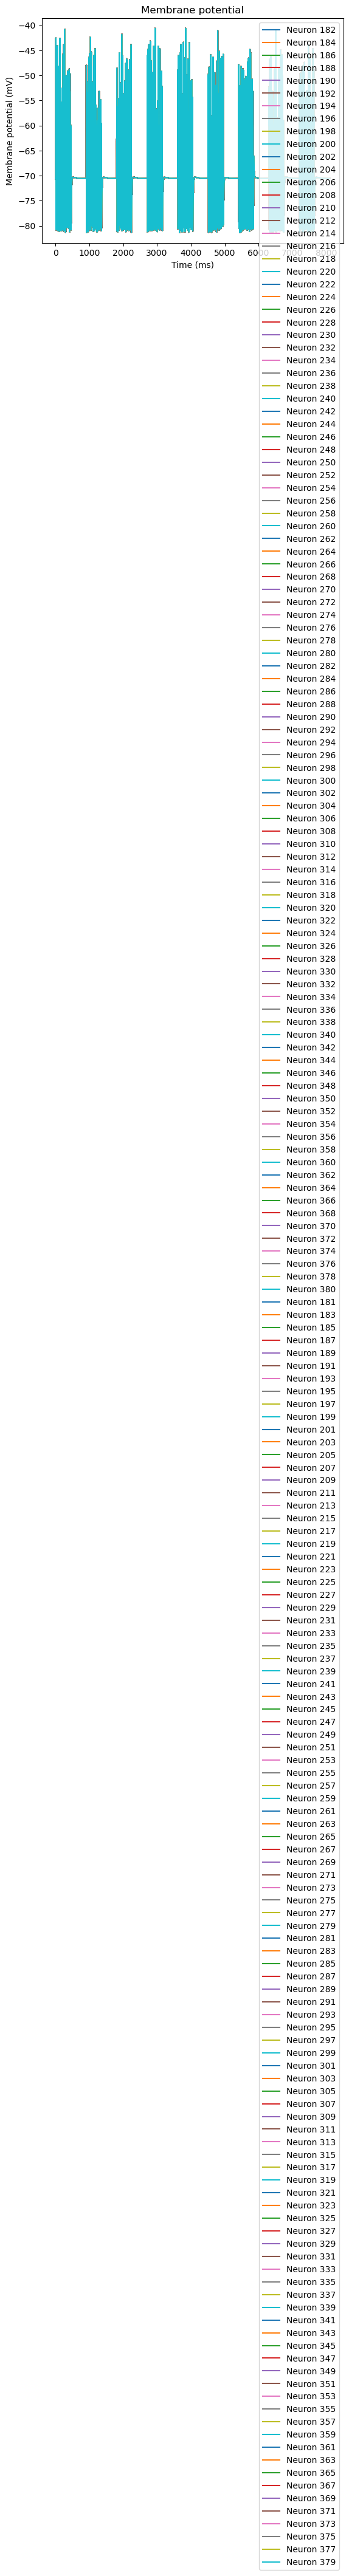

In [14]:
nest.voltage_trace.from_device(net.mult_in)

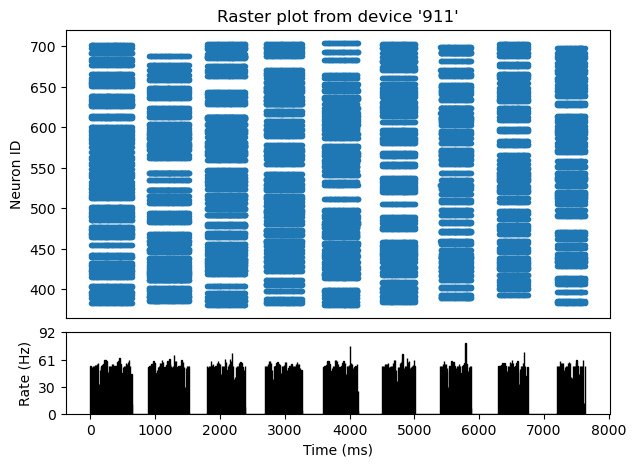

In [15]:
nest.raster_plot.from_device(net.spikes_tc, hist=True)

[[<matplotlib.lines.Line2D at 0x7f12834201a0>],

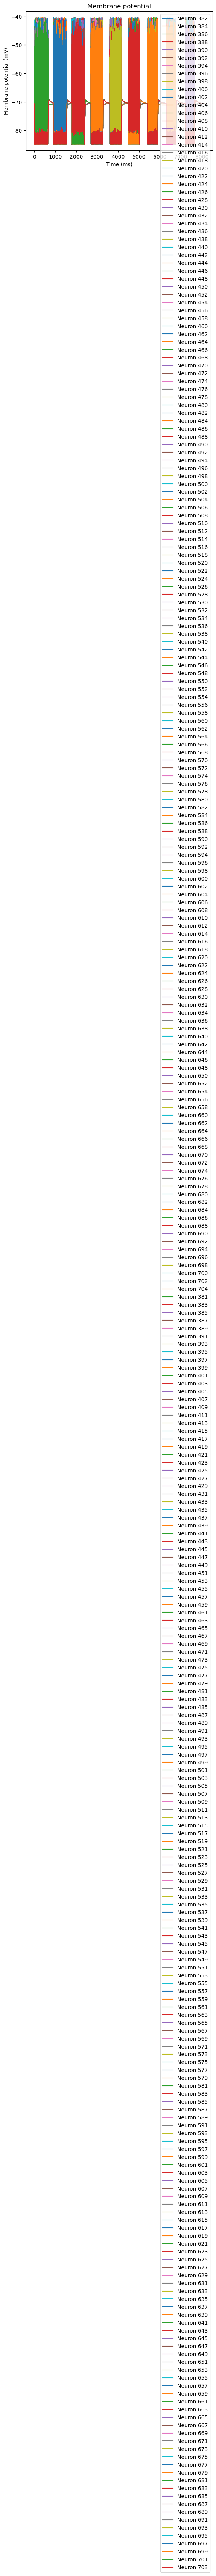

In [16]:
nest.voltage_trace.from_device(net.mult_tc)